In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def buildIceCube():
    positionCube = np.ndarray(shape=(10,10,60,3))

    skew = [[1,-np.tan(np.radians(26.75)),0],[0,1,0],[0,0,1]]

    xyscale = 6
    xoffset = -5.5
    yoffset = -5
    zoffset = -30.5

    for i in range(0,10):
        for j in range(0,6):
            for k in range(0,60):
                positionCube[i,j,k] = np.matmul(skew,[xyscale*(i+xoffset),xyscale*(j+yoffset),k+zoffset])
                positionCube[i,j,k] = np.matmul([[1,0,0],[0,-1,0],[0,0,1]],positionCube[i,j,k])

    for i in range(0,10):
        for k in range(0,60):
            positionCube[i,6,k] = [xyscale*(i+xoffset),xyscale*(5+yoffset),k+zoffset]
            positionCube[i,6,k] = np.matmul([[1,0,0],[0,-1,0],[0,0,1]],positionCube[i,6,k])

    for i in range(0,10):
        for j in range(6,10):
            for k in range(0,60):
                positionCube[i,j,k] = np.matmul(skew,[xyscale*(i+xoffset),xyscale*(j+yoffset),k+zoffset])
                positionCube[i,j,k] = np.matmul([[1,0,0],[0,-1,0],[0,0,1]],positionCube[i,j,k])
                
    return positionCube

def trimIceCube(iceCube):
    iceCube[4:10,0,:] = None
    iceCube[7:10,1,:] = None
    iceCube[8:10,2,:] = None
    iceCube[9,3,:]    = None
    iceCube[0,6,:]    = None
    iceCube[0:2,7,:]  = None
    iceCube[0:3,8,:]  = None
    iceCube[0:4,9,:]  = None
    
    return iceCube

def plotIceCube3D(iceCube):
    fig = plt.figure()
    ax2 = fig.add_subplot(111, projection='3d')
    ax2.scatter(xs=iceCube[:,:,:,0], ys=iceCube[:,:,:,1], zs=iceCube[:,:,:,2], zdir='z', s=20, c=None, depthshade=True)
    plt.show()
    
    return

def plotIceCube2D(iceCube):
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    ax.scatter(x=iceCube[:,:,:,0], y=iceCube[:,:,:,1])
    plt.show()
    
    return

def drawSphere(iceCube, r, spread, stdevs):
    sphereCube = np.ndarray(shape=(10,10,60), dtype=np.float)
    sphereCube.fill(0)
    for i in range(0,10):
        for j in range(0,10):
            for k in range(0,60):
                rPoint = np.sqrt(iceCube[i,j,k,0]**2+iceCube[i,j,k,1]**2+iceCube[i,j,k,2]**2)
                if np.abs(r - rPoint) < stdevs*spread:
                    sphereCube[i,j,k] = (1/np.sqrt(2*np.pi*spread**2)*(np.exp(-(r - rPoint)**2/(2*spread**2))))
    
    return sphereCube

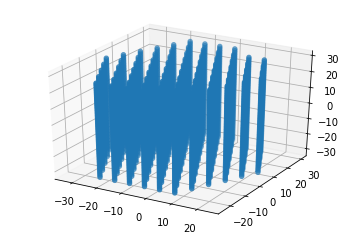

In [16]:
positionCube = buildIceCube()
plotIceCube3D(trimIceCube(positionCube))

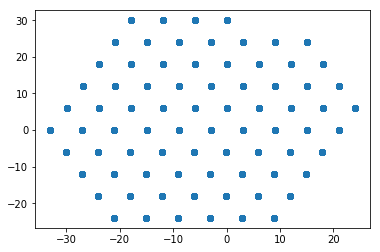

In [17]:
plotIceCube2D(trimIceCube(positionCube))

In [24]:
spread  = 5
stdevs  = 1
fps     = 24
rMax    = 40
time    = 2
frames  = [fps*time*2,np.ndarray(shape=(10,10,60,3), dtype=np.int8)]
radii   = np.linspace(0,rMax,num=fps*time)

for i in range(0,len(radii)):
    frames[i*2,:,:,:,0]   = np.floor(255 * drawSphere(positionCube,radii[i],spread,stdevs))
    frames[i*2+1,:,:,:,0] = 0

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:69: RuntimeWarning: invalid value encountered in absolute


TypeError: list indices must be integers or slices, not tuple

In [ ]:
nextPos = 0
string  = np.ndarray(shape=(78,60,3))

for k in frames:
    for i in range(0,78):
        for j in range(0,60):
            temp = string[i,j]
            string[i,j] = k[i,j]
            if !temp.isEqual(k[i,j]):
                eventOut[nextPos] = str(i) + ',' + str(j) + ',' + str(k.r) + ',' + str(k.g) + ',' + str(k.b) + '\n'
                nextPos = nextPos + 1


                
        